# GraphReasoning: Scientific Discovery through Knowledge Extraction and Multimodal Graph-based Representation and Reasoning

Markus J. Buehler, MIT, 2024 mbuehler@MIT.EDU

### Example: GraphReasoning: Loading graph and graph analysis

In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device='cuda'

In [2]:
from tqdm.notebook import tqdm
from IPython.display import display, Markdown
from huggingface_hub import hf_hub_download

from GraphReasoning import *

### Load graph and embeddings 

In [28]:
#Hugging Face repo
repository_id = "lamm-mit/GraphReasoning"
data_dir='./GRAPHDATA/'    

data_dir_output='./GRAPHDATA_OUTPUT/'

graph_name='BioGraph.graphml'

make_dir_if_needed(data_dir)
make_dir_if_needed(data_dir_output)

tokenizer_model="BAAI/bge-large-en-v1.5"

embedding_tokenizer = AutoTokenizer.from_pretrained(tokenizer_model, ) 
embedding_model = AutoModel.from_pretrained(tokenizer_model, ) 

filename = f"{data_dir}/{graph_name}"
file_path = hf_hub_download(repo_id=repository_id, filename=filename,  local_dir='./')
print(f"File downloaded at: {file_path}")

graph_name=f'{data_dir}/{graph_name}'
G = nx.read_graphml(graph_name)

File downloaded at: ./GRAPHDATA/BioGraph.graphml


In [19]:
file_path

'/home/mbuehler/.cache/huggingface/hub/models--lamm-mit--GraphReasoning/snapshots/212d7540263d3ad6c560701989ec9313a3a14798/GRAPHDATA/BioGraph.graphml'

In [29]:
embedding_file='BioGraph_embeddings_ge-large-en-v1.5.pkl'

generate_new_embeddings=False
if generate_new_embeddings:
    node_embeddings = generate_node_embeddings(G, embedding_tokenizer, embedding_model, )
    save_embeddings(node_embeddings, f'{data_dir}/{embedding_file}')
    
else:

    from huggingface_hub import hf_hub_download

    filename = f"{data_dir}/{embedding_file}"
    file_path = hf_hub_download(repo_id=repository_id, filename=filename, local_dir='./')
    print(f"File downloaded at: {file_path}")

    node_embeddings = load_embeddings(f'{data_dir}/{embedding_file}')

File downloaded at: ./GRAPHDATA/BioGraph_embeddings_ge-large-en-v1.5.pkl


### Graph statistics and properties

/home/mbuehler/miniconda3/envs/PyTorch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/mnt/d/MIT LAMM Dropbox/Markus J. Buehler/CODES FOR JUPYTER - SHARED/BioKnowledgeGraph/GraphReasoning/graph_tools.py:304: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster} (n={cluster_counts[cluster]})'


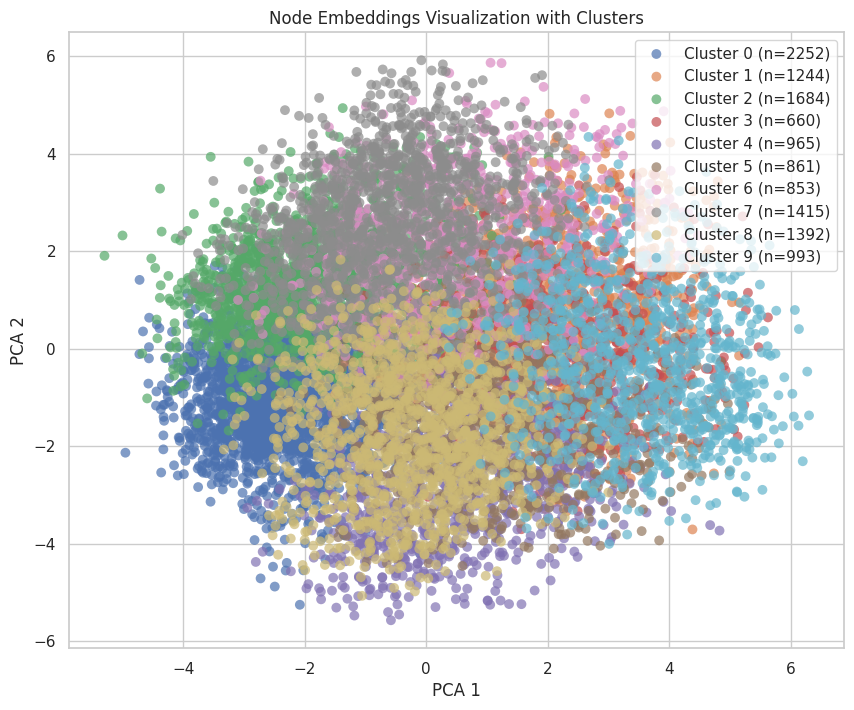

Cluster 0: 2252 items
Closest 10 node IDs to centroid: ['(x)' 'publication' 'product' '0' 'extend' 'approximately 2900 pn'
 'model' 'university' 'individuals' 'highceramiccontent']
Cluster 1: 1244 items
Closest 10 node IDs to centroid: ['micro- or nano-scale materials' 'nanoscale components'
 'mesoscopic material assembly (mma)' 'nanocomponents'
 'micro/nanostructures' 'multiscale materials' 'micropillar materials'
 'underlying nano- and microscale structures' 'nanoscaffold'
 'nanostructures']
Cluster 2: 1684 items
Closest 10 node IDs to centroid: ['isotropic behavior' 'effectiveradiusofcurvature' 'anisotropic behavior'
 'size-dependent orientation'
 'feiiiinducedsimultaneoussaltingoutandcoordinationcrosslinking'
 'arch-shaped samples' 'vertically oriented surfaces'
 'continuously varying diameters'
 'precise control over thickness distribution'
 'loading directions perpendicular to growth lines']
Cluster 3: 660 items
Closest 10 node IDs to centroid: ['collagen microfibers' 'collagen f

In [5]:
visualize_embeddings_2d_pretty_and_sample(node_embeddings, n_clusters=10, n_samples=10, data_dir=data_dir_output, alpha=.7)

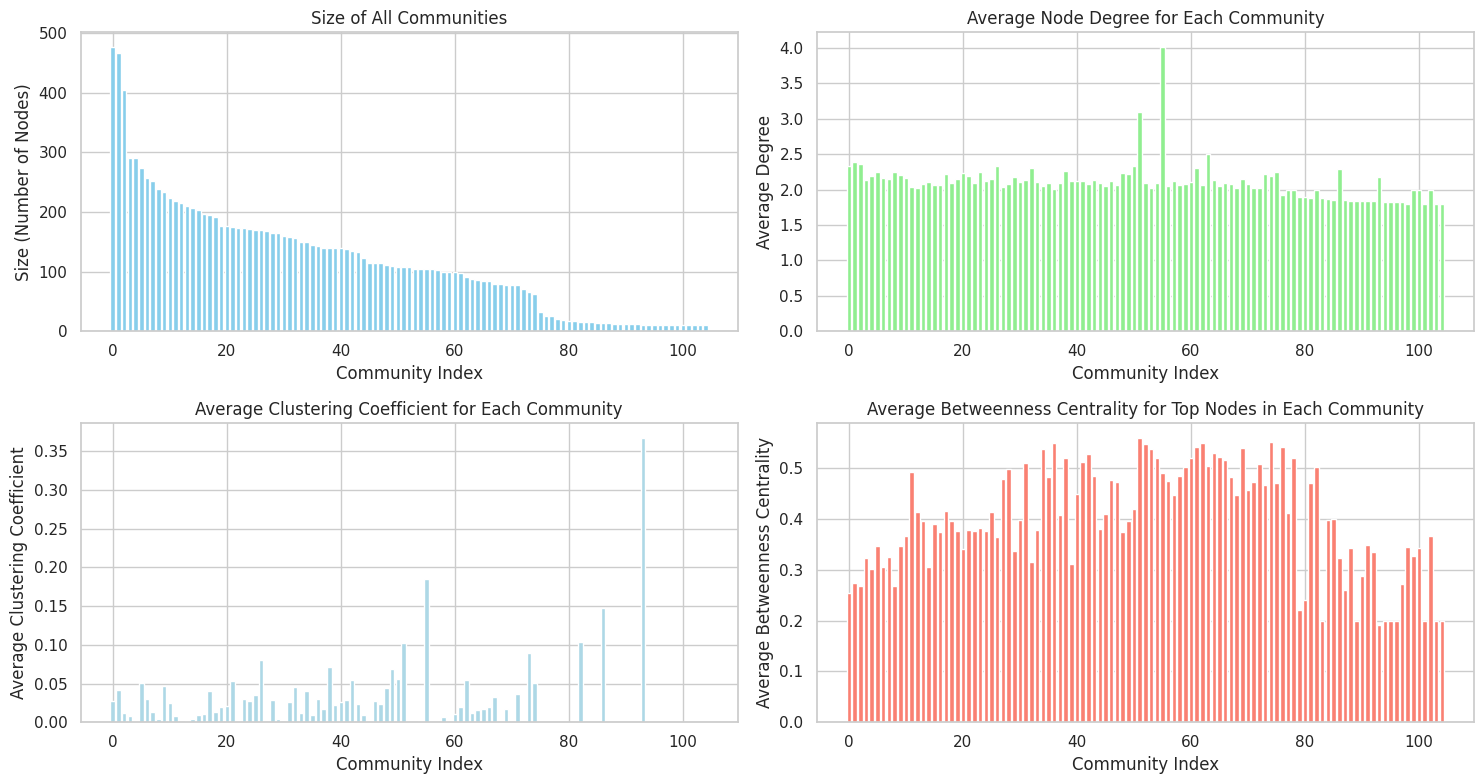

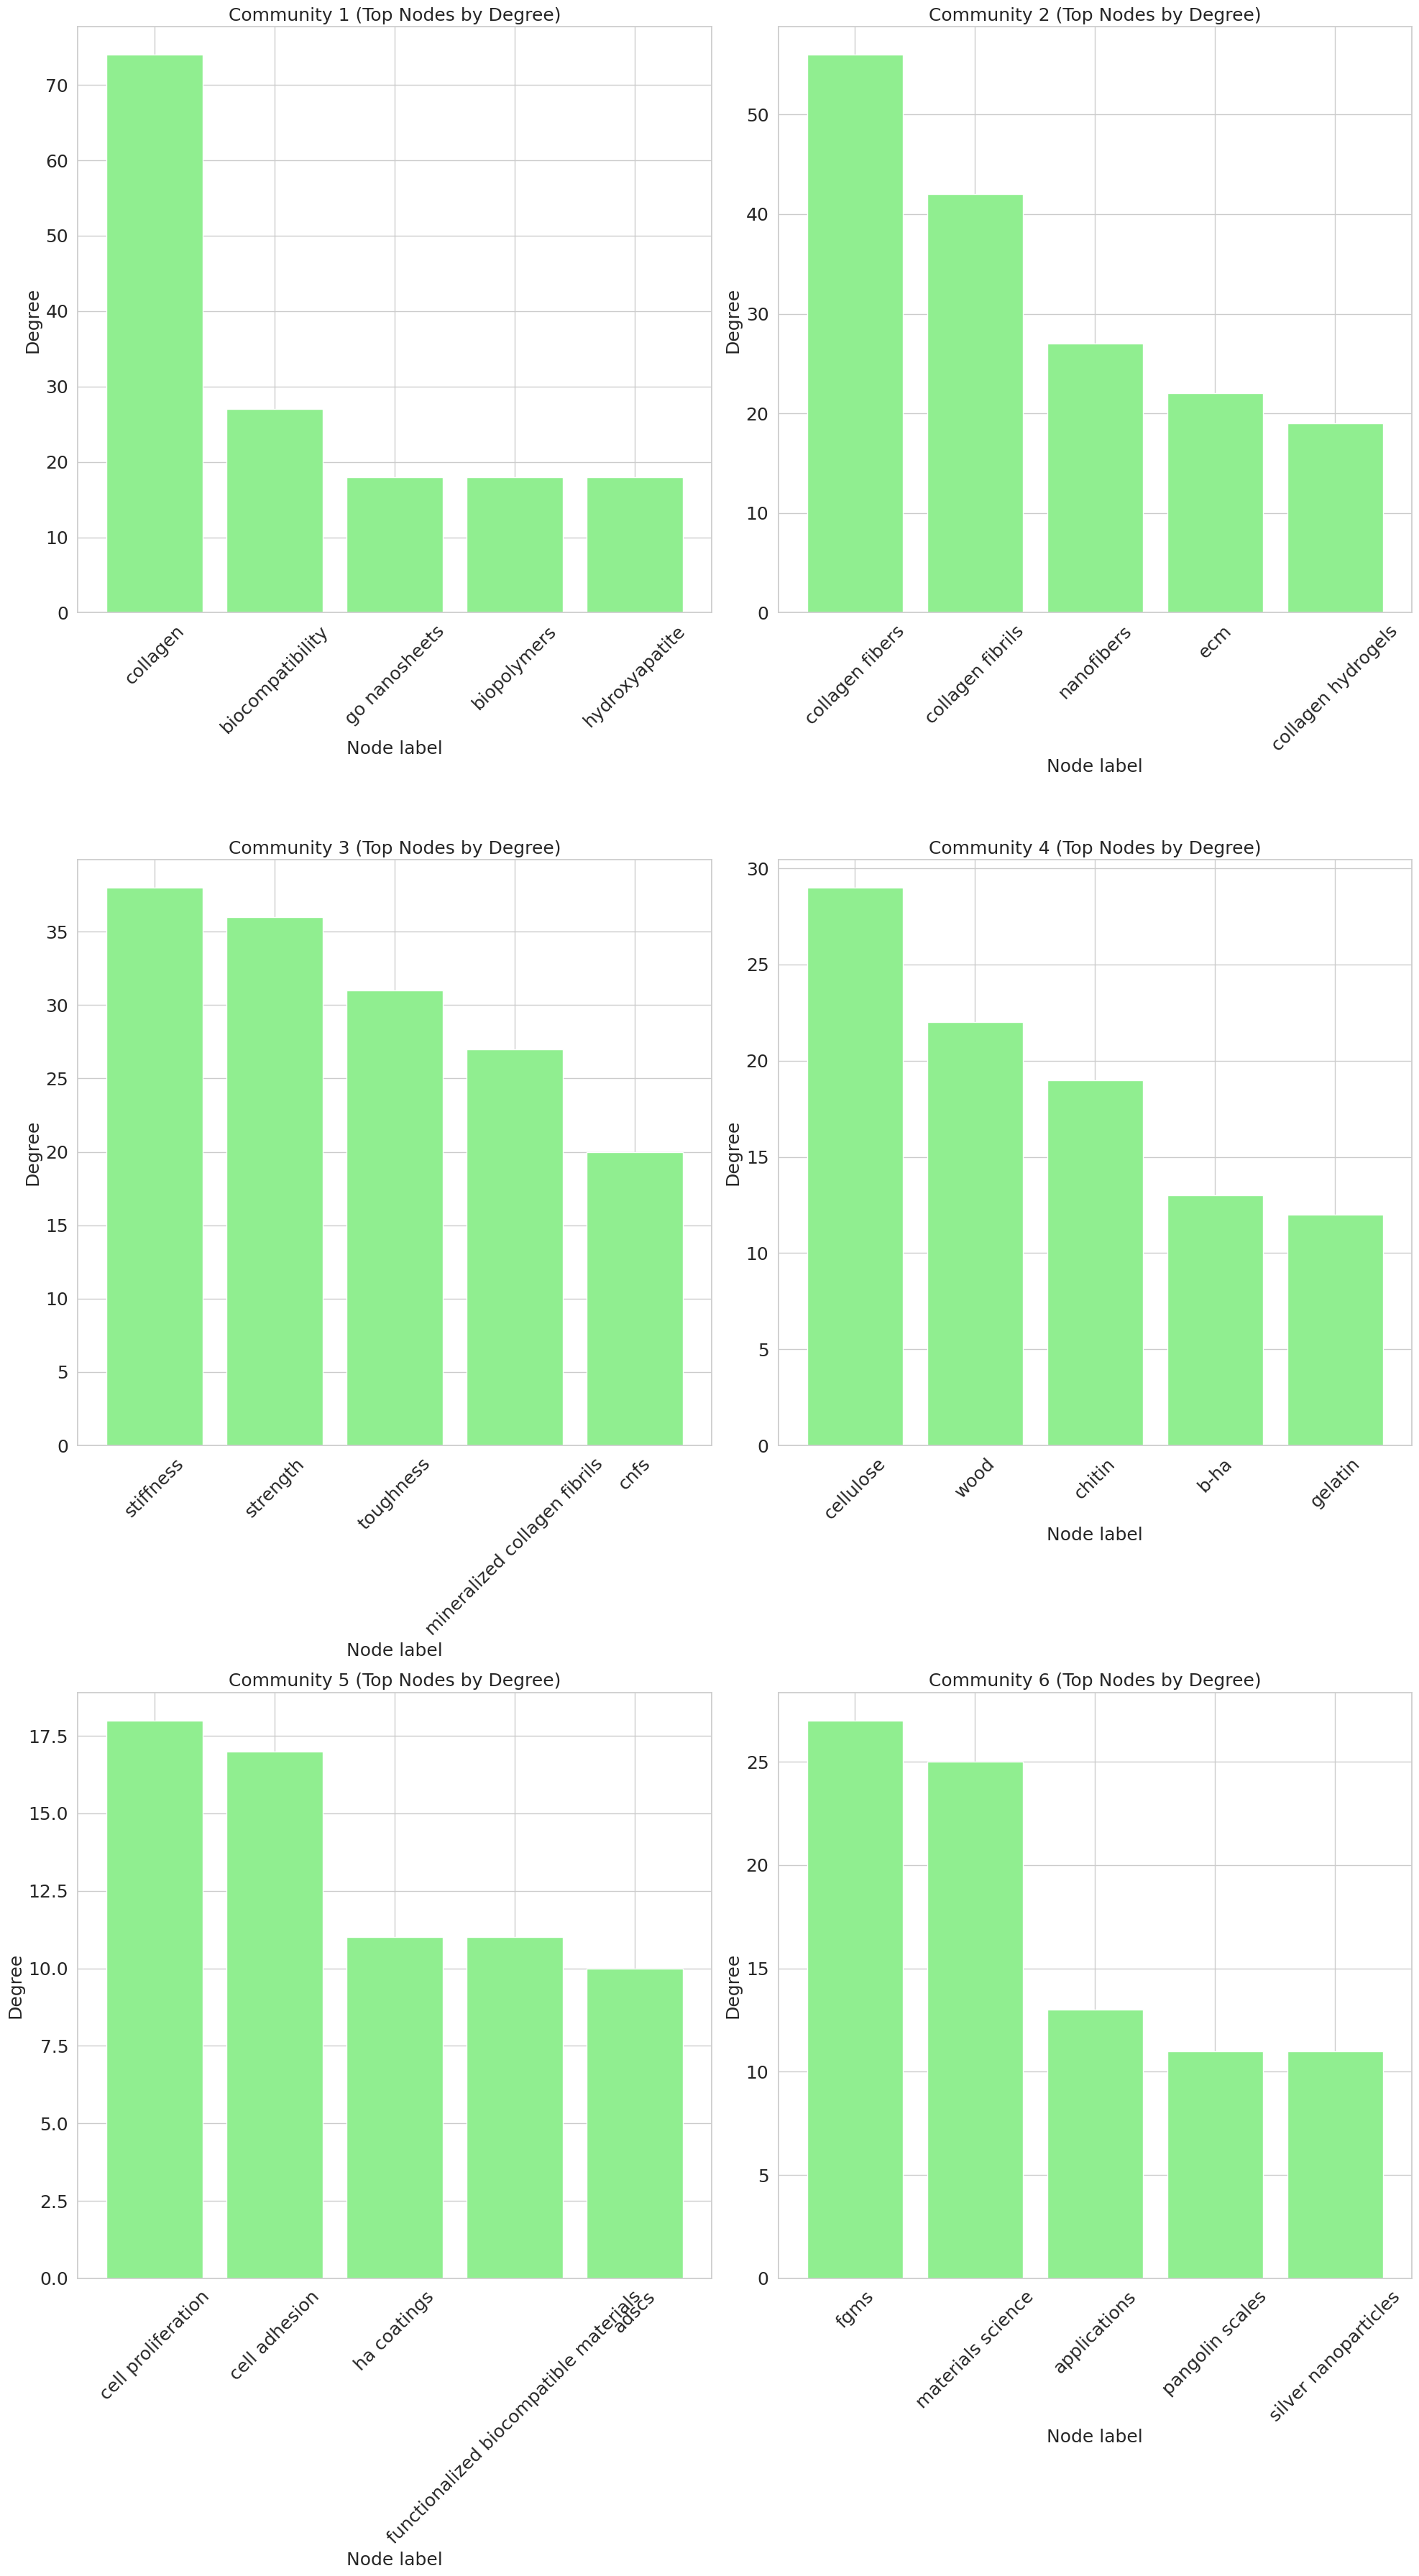

In [6]:
describe_communities_with_plots_complex(G, N=6, data_dir=data_dir_output)

In [9]:
graph_statistics_and_plots_for_large_graphs(G, data_dir=data_dir_output,include_centrality=False,
                                               make_graph_plot=False,)

({'Number of Nodes': 12319,
  'Number of Edges': 15752,
  'Average Degree': 2.5573504342884976,
  'Density': 0.00020761084870015405,
  'Connected Components': 28,
  'Number of Communities': 105},
 False)

Calculating best minimal value for power law fit


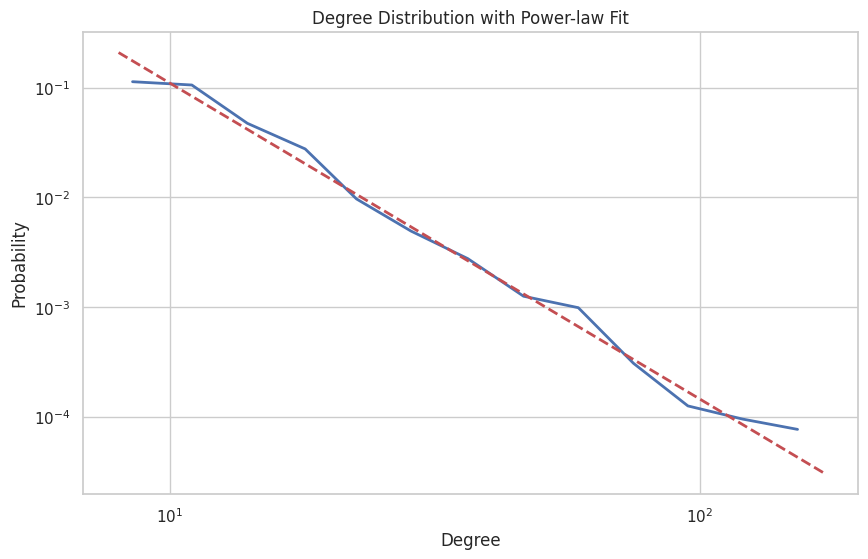

Power-law exponent (alpha): 2.878608414692126
Standard error of alpha: 0.06981793188656632
Loglikelihood ratio (R) comparing power-law to exponential: 4.152630384229304
p-value for the comparison: 3.2867537471918374e-05


(True, <powerlaw.Fit at 0x7fb611b955d0>)

In [10]:
is_scale_free (G, data_dir=data_dir_output)

### Working with the graph

#### Find best fitting node

In [5]:
find_best_fitting_node_list("copper", node_embeddings, embedding_tokenizer, embedding_model, 5)

[('copper', 1),
 ('copper ions', 0.8516542315483093),
 ('copper covering', 0.830559253692627),
 ('copper complexes', 0.8284236192703247),
 ('metals', 0.808043360710144)]

In [6]:
find_best_fitting_node_list("music and sound", node_embeddings , embedding_tokenizer, embedding_model, 5)

[('sound amplification', 0.7679252028465271),
 ('sound control', 0.7642933130264282),
 ('background noise', 0.7297996878623962),
 ('sound insulation', 0.7227849960327148),
 ('sound amplification mechanisms', 0.7180530428886414)]

#### Find path in graph based on two keywords

In [10]:
(best_node_1, best_similarity_1, best_node_2, best_similarity_2), path, path_graph, shortest_path_length, fname, graph_GraphML=find_path( G, node_embeddings,
                                embedding_tokenizer, embedding_model , second_hop=False, data_dir=data_dir_output,
                                  keyword_1 = "copper", keyword_2 = "silk",
                                      similarity_fit_ID_node_1=0, similarity_fit_ID_node_2=0,
                                       )



0nth best fitting node for 'copper': 'copper' with similarity: 1
0nth best fitting node for 'silk': 'silk' with similarity: 1
./GRAPHDATA_OUTPUT//shortest_path_2hops_copper_silk.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_copper_silk.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_copper_silk.graphml


In [11]:
path

['copper', 'nanoparticles', 'cells', 'biological materials', 'silk']

In [12]:
path_list, path_string=print_path_with_edges_as_list(G , path)
path_list,path_string

(['copper',
  'Such as',
  'nanoparticles',
  'interact',
  'cells',
  'enable self-healing capabilities',
  'biological materials',
  'provide functionalities',
  'silk'],
 'copper --> Such as --> nanoparticles --> interact --> cells --> enable self-healing capabilities --> biological materials --> provide functionalities --> silk')

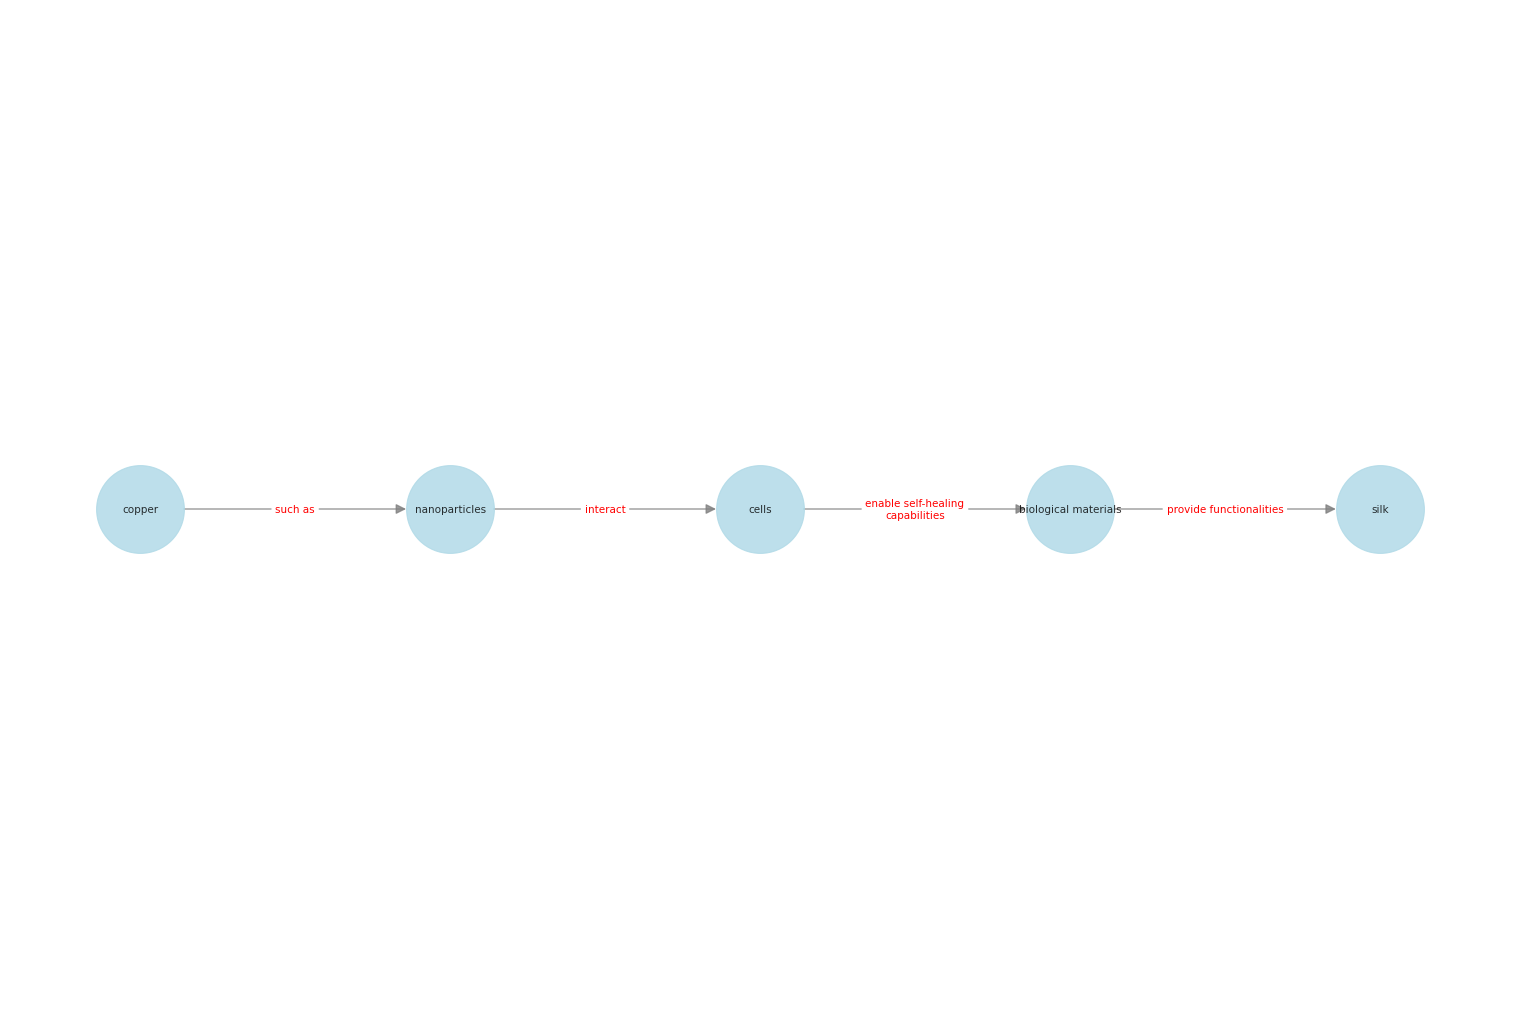

In [16]:
visualize_paths_pretty([path_list], 'knowledge_graph_paths.svg', display_graph=True,data_dir=data_dir_output, scale=0.75)

In [26]:
triplets=find_all_triplets(path_graph) 

In [27]:
triplets

['exceptional mechanical properties-biological materials-mechanical properties',
 'exceptional mechanical properties-biological materials-biocompatibility',
 'exceptional mechanical properties-biological materials-nanoscale materials',
 'exceptional mechanical properties-biological materials-substrate',
 'exceptional mechanical properties-biological materials-spider silk',
 'exceptional mechanical properties-biological materials-nacre',
 'exceptional mechanical properties-tensile strength-spider silk',
 'exceptional mechanical properties-tensile strength-nacre',
 'energy consumption-biological materials-mechanical properties',
 'energy consumption-biological materials-biocompatibility',
 'energy consumption-biological materials-substrate',
 'covalent cross-links-biological materials-mechanical properties',
 'covalent cross-links-biological materials-biocompatibility',
 'covalent cross-links-biological materials-substrate',
 'natural sources-biological materials-mechanical properties',
